# Lab4: Object Detection vs Segmentation


![ObjectDetection](https://drive.google.com/uc?id=1AeG8F2TYEMUWy6huTWBDPsU0NnLr-pyK ).


Object detection detects targets with bounding boxes to enable their classification and localization in an image.


The segmentation problem in computer vision refers to the division of an image into meaningful regions or segments based on features such as color, intensity, texture, or contours. The primary objective is to distinguish and identify the objects within the image by accurately delineating the boundaries between them.


![Image Segmentation](https://drive.google.com/uc?id=1TABoIVgRUlUAEaFe_jzG0aOiQM5dk9qX )

From a computational standpoint, Segmentation can be interpreted as a pixel-level classification problem.

Segmentation provides fine-grained information about object boundaries and regions, while detection focuses on identifying specific objects and their locations.



**Some uses cases**


*   Autonomous Vehicles
*   Medical Imaging Analysis
*   Analysis of Satellite Images
*   Smart Agriculture
*   Industrial Inspection



###Intersection over union

The Intersection over Union (IoU) is a metrics used in both, object detection and segmentation problems.

 It is defined as the ratio between the intersection area between the predicted mask and the ground truth mask, over the union between the two masks.

![](https://miro.medium.com/max/300/0*kraYHnYpoJOhaMzq.png)


*   IoU scores close to 1.0 indicate a high level of accuracy. The predicted and ground truth areas overlap perfectly, meaning the area of overlap equals the area of union.

when the predicted and groud truth areas overlap eachother perfectly. In other words, if the area of overlap is the same of the area of union.

*   Conversely, IoU scores close to 0 suggest poor accuracy, indicating little to no overlap between the predicted and ground truth regions.




In the case of segmentation, the intersection over union is computed considering each individual pixel in the predicted segmentation mask and the ground truth mask.

$$
IoU_{pixel} = \frac{\sum_{i=1}^{N}(P_i \cap G_i)}{\sum_{i=1}^{N}(P_i \cup G_i)}
$$


Where:


*   *Pi* is the predicted segmentation mask at pixel i,
*   *Gi* is the ground truth mask at pixel i,
*   *∩* denotes the intersection operator,
*   *∪* denotes the union operator, and
*   *N* is the total number of pixels in the image.

**Recap of accuracy formula:**
$$
Accuracy = \frac{Number\ of\ right\ predictions}{Total\ number\ of\ predictions}
$$


### What is a mask?

Img shape: (416, 735, 3)


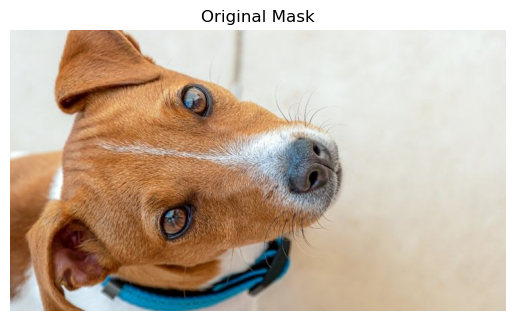

In [1]:
import imageio.v2 as imageio
import numpy as np
import matplotlib.pyplot as plt

url="https://drive.google.com/uc?id=1vWgkE4_TUuBJhlsZv7JdURRCM_WoYNRl"
img = imageio.imread(url)#download a picture

plt.imshow(img)
plt.title('Original Mask')
plt.axis('off')
print("Img shape:",img.shape)

Another examples is the following text

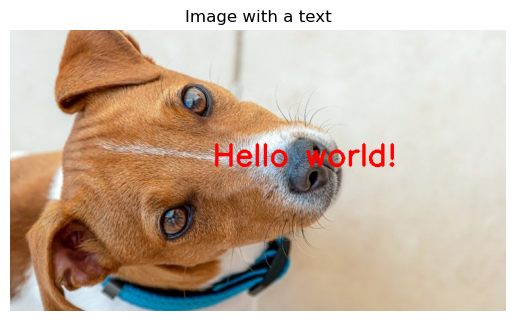

Text Img shape: (416, 735, 3)


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

text = 'Hello world!'
my_color =  [255,0,0] #Red of rgb
text_image = cv2.putText(img.copy(), text,(300, 200), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1.5, color=my_color, thickness=3)

# Display the image with text
plt.imshow(text_image)  # Matplotlib converts from greyscale to a colormap
plt.axis('off')  # Hide axes
plt.title('Image with a text')
plt.show()
print("Text Img shape:",text_image.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
mask shape: (416, 735)


(-0.5, 734.5, 415.5, -0.5)

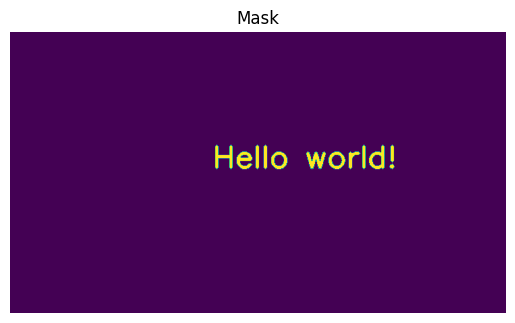

In [ ]:
color_red = [255,0,0]
mask = (text_image == color_red).all(axis=2).astype(np.uint8)
print( mask )
print("mask shape:", mask.shape)
#the mask is printable
plt.imshow(mask)
plt.title('Mask')
plt.axis('off')

Masking is the process of pinpointing pixel locations associated with each object or area. This action generates binary images with the same dimensions as the input. Here, the pixels corresponding to the object of interest are True (or 1), while the rest are False (or 0).

The concept is something that can be found in several contexts:

*   A ground truth can be a mask
*   An attention meccanism of a Transformers can be a mask.
*   Data Augmentation techinques such as Partial Erasing or Occlusion are based on mask.
*   A loss function can be modified trough a mask.
*   The dropout can be implemented as a mask.

#Image Segmentation



This is generally done with a Convolutional Neural Network that act as an image-to-image transform, mapping each pixel of $x$ to the corresponding class.

*Remind:* Given an image $x \in \mathbb{R}^{m \times n \times c}$, an image-to-image map is a function $f: \mathbb{R}^{m \times n \times c} \to \mathbb{R}^{m' \times n' \times c'}$. In our situation, $m = m'$, $n = n'$ and $c = c'$. An image-to-image map is required to do segmentation and some image processing tasks, but not for classification or object detection. \\

Image-to-image maps are usually implemented by some variant of a Fully Convolutional Neural Network (FNN) design (e.g. ResNet, Autoencoders, ...). See https://heartbeat.comet.ml/a-2019-guide-to-semantic-segmentation-ca8242f5a7fc for details.

![Image Segmentation](https://drive.google.com/uc?id=1A2zksYq9ehq5ghNKl2sOZfkochbbgFDG )


**Semantic segmentation** separates different classes at the pixel level but does not separate different instances of the same class. The **Object detection** separates instances but provides only a crude approximation of the instance shape (the box).The task of **Instance segmentation** lays at the intersection of the two. It can be defined as the task of detecting all instances of the objects of interest in an image and classifying them; and segmenting them from the background at the pixel level.

![Image Segmentation](https://drive.google.com/uc?id=1xO189Tlv8GbE86sncajEn6LmkE3NTu6l )

###Some Datasets:

*   Pascal2:11540 images,6,929 segmentation masks and 20 categories.
     http://host.robots.ox.ac.uk/pascal/VOC/voc2012/index.html:

*   ADEK20:images 25K+2K and 150 categories.
     https://groups.csail.mit.edu/vision/datasets/ADE20K/
*   Cityscapes Dataset: https://www.cityscapes-dataset.com/
*   Mapillar Vistas: https://www.mapillary.com/dataset/vistas


In [20]:
!pip install keras_cv -q

In [21]:
import random
import os
from pathlib import Path
import keras
import keras_cv
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

# Image Config
HEIGHT = 64
WIDTH = 64
NUM_CLASSES = 3
AUTOTUNE = tf.data.AUTOTUNE #optimize hw performance automatically
BATCH_SIZE = 32

dir="./model_weights"
if not Path(dir).exists():
  os.mkdir(dir)
  print("Folder was created")

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In this tutorial we are going to introduce [The Oxford-IIIT Pet Dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/).



In [9]:
#Download the datasets
tfds.disable_progress_bar()
orig_train_ds, orig_val_ds = tfds.load(
    name="oxford_iiit_pet",
    split=["train+test[:80%]", "test[80%:]"],
)

# Calcola il numero di elementi in ciascun dataset
num_train_elements = tf.data.experimental.cardinality(orig_train_ds).numpy()
num_val_elements = tf.data.experimental.cardinality(orig_val_ds).numpy()

print("Training set length:", num_train_elements)
print("Test set length:", num_val_elements)


Training set length: 6615
Test set length: 734


In [10]:
#data preprocessing
def rescale_images_and_correct_masks( inputs):
  return {
    "images": tf.cast(inputs["image"], dtype=tf.float32) / 255.0, #normalization
    "segmentation_masks": inputs["segmentation_mask"] - 1, #put all values as 0-based.

  }
#now the label of the ground truth pixels are 0 for pet, 1 for borders, 2 for background


#utility function
def unpackage_inputs(inputs):
    images = inputs["images"]
    segmentation_masks = inputs["segmentation_masks"]
    return images, segmentation_masks


train_ds = orig_train_ds.map( rescale_images_and_correct_masks, num_parallel_calls=AUTOTUNE )
val_ds = orig_val_ds.map(rescale_images_and_correct_masks, num_parallel_calls=AUTOTUNE)

resize_fn = keras_cv.layers.Resizing( HEIGHT, WIDTH )

resized_val_ds = (
    val_ds.map(resize_fn, num_parallel_calls=AUTOTUNE)
    .batch(BATCH_SIZE)
    .map(unpackage_inputs)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

resized_train_ds = (
    train_ds.map(resize_fn, num_parallel_calls=AUTOTUNE)
    .batch(BATCH_SIZE)
    .map(unpackage_inputs)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

Image Shape: (4, None, None, 3)
Segmentation Mask Shape: (4, None, None, 1)


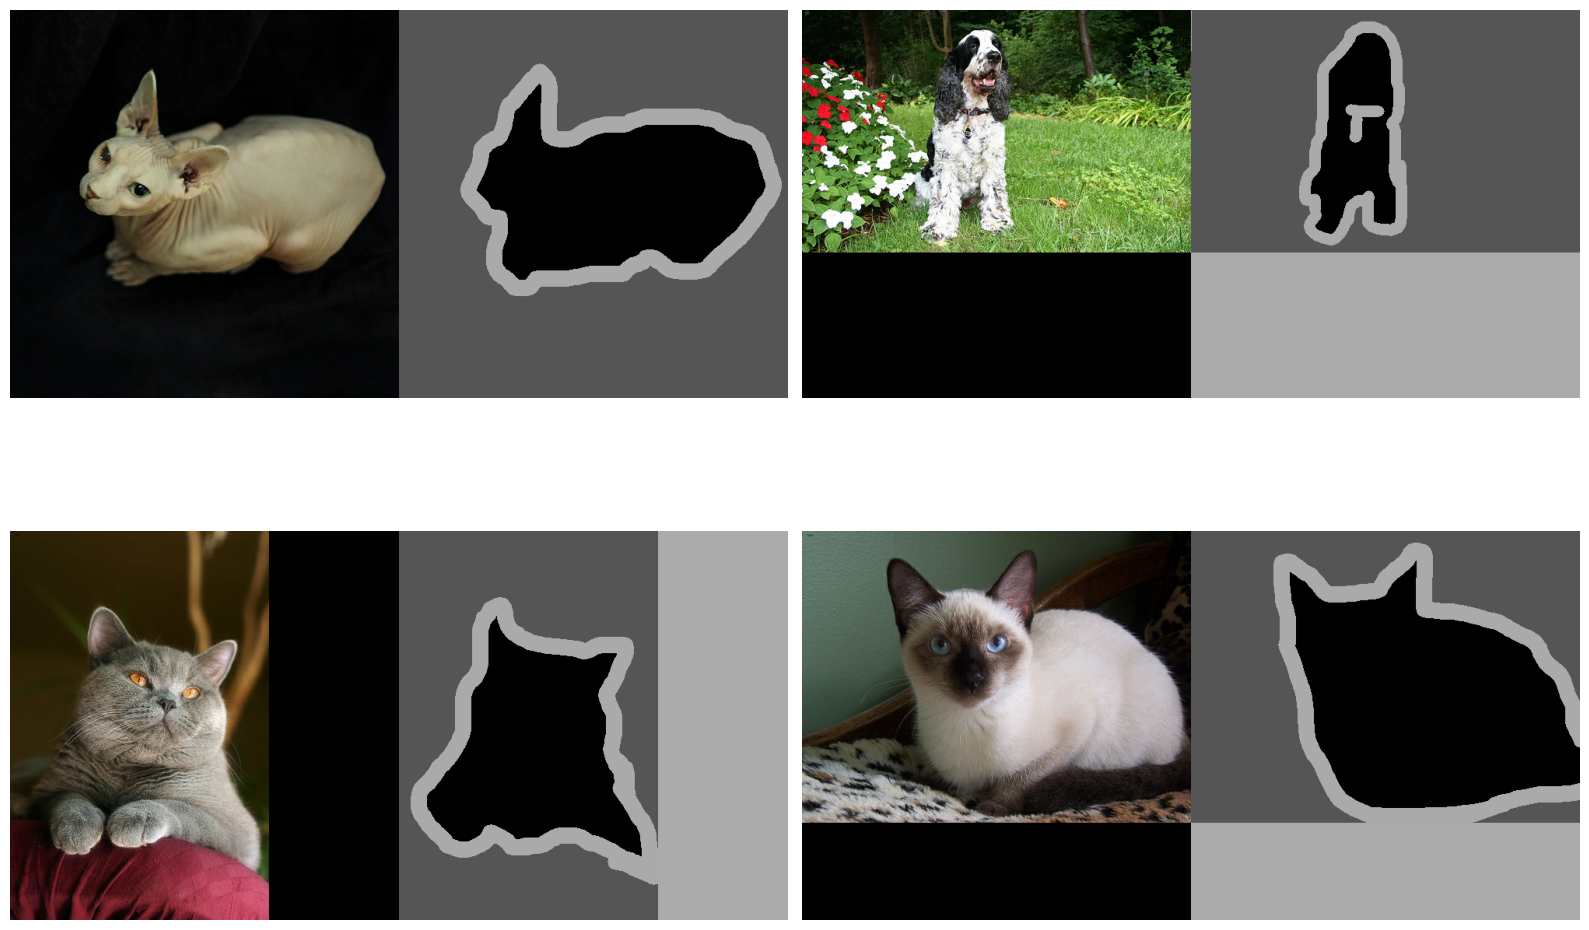

In [11]:
plot_train_ds = train_ds.map(unpackage_inputs).ragged_batch(4)
#resized_train_ds
images, segmentation_masks = next(iter(plot_train_ds.take(1)))

print( f"Image Shape: {images.shape}"  )
print( f"Segmentation Mask Shape: {segmentation_masks.shape}"  )

keras_cv.visualization.plot_segmentation_mask_gallery(
    images,
    value_range=(0, 1),
    num_classes=3,
    y_true=segmentation_masks,
    y_pred=None,
    scale=8,
    rows=2,
    cols=2,
)

In [12]:
#Create a callback

# Taking a batch of test inputs to measure model's progress.
test_images, test_masks = next(iter(resized_val_ds))

class DisplayCallback(keras.callbacks.Callback):
    def __init__(self, epoch_interval=None):
        self.epoch_interval = epoch_interval

    def on_epoch_end(self, epoch, logs=None):
        if self.epoch_interval and epoch % self.epoch_interval == 0:

            self.model.save_weights(save_path)

            pred_masks = self.model.predict(test_images)
            pred_masks = tf.math.argmax(pred_masks, axis=-1)
            pred_masks = pred_masks[..., tf.newaxis] #add a new dimension at the end of pred_masks.
            # ... is a placeholder for dimensions

            # Randomly select an image from the test batch
            random_index = random.randint(0, BATCH_SIZE - 1)
            random_image = test_images[random_index]
            random_pred_mask = pred_masks[random_index]
            random_true_mask = test_masks[random_index]

            fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
            ax[0].imshow(random_image)
            ax[0].set_title(f"Image: {epoch:03d}")

            ax[1].imshow(random_true_mask)
            ax[1].set_title(f"Ground Truth Mask: {epoch:03d}")

            ax[2].imshow(random_pred_mask)
            ax[2].set_title(f"Predicted Mask: {epoch:03d}", )

            plt.show()
            plt.close()

early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    restore_best_weights=True,
    start_from_epoch=0,
    patience=3
)


callbacks = [DisplayCallback(5),early_stopping]

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

## UNet

Maybe the most known network architecture used for segmentation is the UNet.

![](https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/u-net-architecture.png)

its architecture is based on the formula that you studied to compute the receptive field of a convolutional neural network:

$$
D' = S(D-1) + K
$$

where $D'$ is the receptive field of the previous layer, $D$ is the receptive field on the following layer, $S$ is the stride and $K$ is the kernel size. \\

A consequence of this formula is that the receptive field increases exponentially while moving down, linearly while moving right. \\

The drawback of downsampling, which is the information loss, is solved by UNet by adding skip connections, that also act as training stabilizer. \\

Note that, at every downsampling (which in this case is implemented as a MaxPooling2D layer), the number of filters double, to reduce the impact of the dimensionality loss (the total number of pixel after downsampling is divided by 4).

In [13]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Concatenate

def down_block(inputs, filters, kernel_size=(3, 3), padding='same', activation='relu'):
    conv = Conv2D(filters, kernel_size, activation=activation, padding=padding)(inputs)
    conv = Conv2D(filters, kernel_size, activation=activation, padding=padding)(conv)
    pool = MaxPooling2D(pool_size=(2, 2))(conv)
    return conv, pool

def up_block(inputs, skip, filters, kernel_size=(3, 3), padding='same', activation='relu'):
    up = UpSampling2D(size=(2, 2))(inputs)
    concat = Concatenate()([up, skip])
    conv = Conv2D(filters, kernel_size, activation=activation, padding=padding)(concat)
    conv = Conv2D(filters, kernel_size, activation=activation, padding=padding)(conv)
    return conv


def unet(img_size=(256, 256, 1), num_classes=1):
    inputs = Input(shape=img_size + (3,))

    #Down Blocks
    conv1, pool1 = down_block(inputs, 64)
    conv2, pool2 = down_block(pool1, 128)
    conv3, pool3 = down_block(pool2, 256)

    # Bottleneck
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool3)
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv4)

    #Up Blocks
    conv5 = up_block(conv4, conv3, 256)
    conv6 = up_block(conv5, conv2, 128)
    conv7 = up_block(conv6, conv1, 64)

    # Add a per-pixel classification layer
    outputs = keras.layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(conv7)

    model = Model(inputs=inputs, outputs=outputs, name="unet")
    return model


# Build model
model = unet(img_size=(HEIGHT, WIDTH), num_classes=NUM_CLASSES)
save_path=f"./model_weights/weights_img{HEIGHT}x{WIDTH}.weights.h5"
if tf.test.gpu_device_name():
    print('TensorFlow is using GPU/TPU')
else:
    print('TensorFlow is using CPU')

TensorFlow is using CPU


No weights loaded:
[Errno 2] Unable to synchronously open file (unable to open file: name = './model_weights/weights_img64x64.weights.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/steptep - accuracy: 0.6255 - loss: 0.83


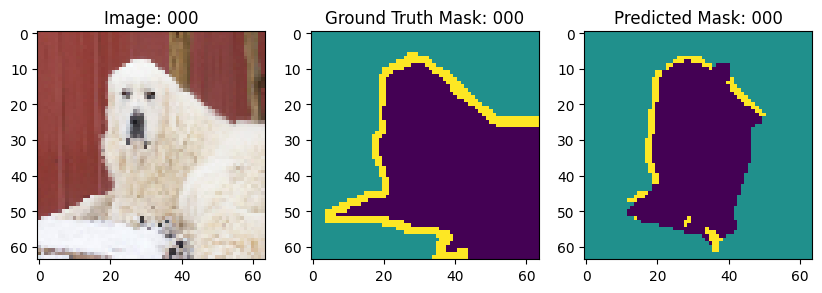

207/207 ━━━━━━━━━━━━━━━━━━━━ 38s 105ms/step - accuracy: 0.6258 - loss: 0.8358 - val_accuracy: 0.7673 - val_loss: 0.5817
Epoch 2/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.7751 - loss: 0.5657 - val_accuracy: 0.8087 - val_loss: 0.4877
Epoch 3/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.8182 - loss: 0.4678 - val_accuracy: 0.8283 - val_loss: 0.4405
Epoch 4/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.8364 - loss: 0.4232 - val_accuracy: 0.8441 - val_loss: 0.4017
Epoch 5/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.8514 - loss: 0.3840 - val_accuracy: 0.8496 - val_loss: 0.3991
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step/step - accuracy: 0.8602 - loss: 0.36


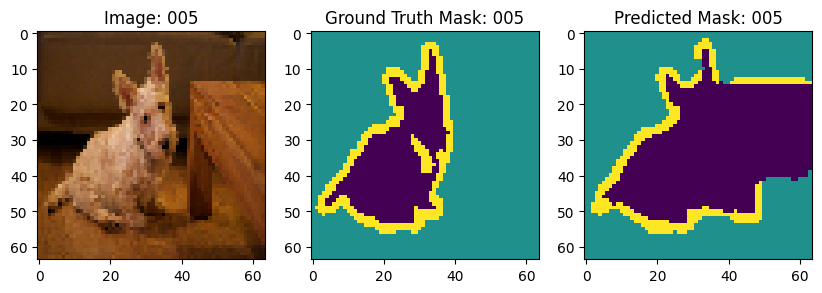

207/207 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.8602 - loss: 0.3632 - val_accuracy: 0.8534 - val_loss: 0.3887
Epoch 7/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.8683 - loss: 0.3410 - val_accuracy: 0.8504 - val_loss: 0.3934
Epoch 8/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.8717 - loss: 0.3318 - val_accuracy: 0.8600 - val_loss: 0.3677
Epoch 9/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.8781 - loss: 0.3155 - val_accuracy: 0.8612 - val_loss: 0.3752
Epoch 10/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.8845 - loss: 0.2985 - val_accuracy: 0.8431 - val_loss: 0.4605
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step/step - accuracy: 0.8826 - loss: 0.30


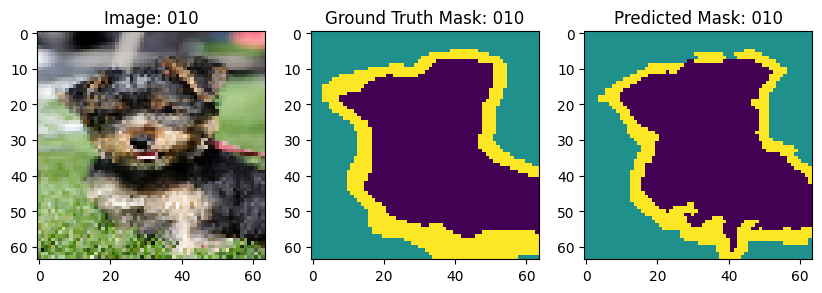

207/207 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.8826 - loss: 0.3055 - val_accuracy: 0.8567 - val_loss: 0.4014
Epoch 12/30
207/207 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.8899 - loss: 0.2851 - val_accuracy: 0.8573 - val_loss: 0.4116


In [ ]:
# Training Config
EPOCHS = 30
LEARNING_RATE = 1e-3

model.compile(
    optimizer=keras.optimizers.Adam(LEARNING_RATE),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

try:
    model.load_weights(save_path)
    print("The model was loaded")
except Exception as e:
    print(f"No weights loaded:\n{e}")


# Train the model, doing validation at the end of each epoch.
history = model.fit(
    resized_train_ds,
    epochs=EPOCHS,
    validation_data=resized_val_ds,
    callbacks=callbacks,
)

In [ ]:
model.save_weights(save_path)

In [ ]:
# np.save("val_accuracy", hist.history['val_accuracy'])

1/1 [==============================] - 7s 7s/step


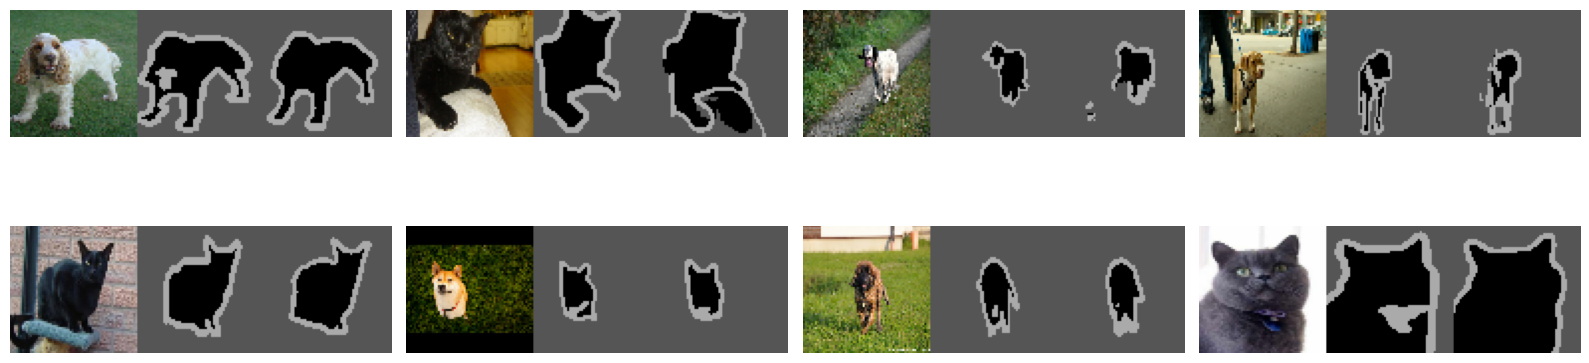

In [15]:
model.load_weights(save_path)

pred_masks = model.predict(test_images)
pred_masks = tf.math.argmax(pred_masks, axis=-1)[..., None]

keras_cv.visualization.plot_segmentation_mask_gallery(
    test_images,
    value_range=(0, 1),
    num_classes=3,
    y_true=test_masks,
    y_pred=pred_masks,
    scale=4,
    rows=2,
    cols=4,
)

#original source code at https://keras.io/examples/vision/oxford_pets_image_segmentation/#prediction-with-trained-model

In [16]:
# Check overfit
loss_history = history.history['loss']
val_loss_history = history.history['val_loss']

acc_history = history.history['accuracy']
val_acc_history = history.history['val_accuracy']

plt.plot(loss_history)
plt.plot(val_loss_history)
plt.grid()
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val Loss'])
plt.title('Loss')
plt.show()

plt.plot(acc_history)
plt.plot(val_acc_history)
plt.grid()
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Val Accuracy'])
plt.title('Accuracy')
plt.show()


NameError: name 'history' is not defined

## Evaluation

There are multiple metrics used to measure the quality of the segmentation. The most important are:

* Accuracy
* Intersection over Union (IoU)
* Dice Coefficient

### Accuracy
The accuracy is simply defined by considering the segmentation as a pixel-by-pixel classification. \\

### Intersection over Union
The Intersection over Union (IoU) is pretty intuitive. It is defined as the ratio between the intersection area between the predicted mask and the ground truth mask, over the union between the two masks.

![](https://miro.medium.com/max/300/0*kraYHnYpoJOhaMzq.png)

By using that the mask is a binary image, it is trivial to compute both the intersection and the union (the latter, computed via the relationship:

$$
\mu (A \cup B) + \mu (A \cap B) = \mu (A) + \mu (B)
$$

where $\mu(A)$ is defined to be the Area of A. \\

Clearly, $IoU(y, y') \in [0, 1]$, and $IoU(y, y') = 1$ in the best case, where $y$ and $y'$ overlap perfectly, and $IoU(y, y') = 0$ when they don't overlap.

In [23]:
# import keras.ops as K
import keras.backend as K

def iou_coeff(y_true, y_pred):
    print("y_true shape", y_true.shape)
    print("y_pred shape", y_pred.shape)
    smooth = 1
    intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
    union = K.sum(y_true,[1,2,3]) + K.sum(y_pred,[1,2,3]) - intersection
    iou = K.mean((intersection + smooth) / (union + smooth), axis=0)
    return iou

def evaluate_model(model, validation_dataset, fun):
    y_pred = model.predict(validation_dataset)
    y_true = np.concatenate([y for x, y in validation_dataset], axis=0)
    y_pred = y_pred.astype('float32')
    y_true = y_true.astype('float32')
    evaluation_result = fun(y_true, y_pred)
    return evaluation_result

iou = evaluate_model(model, resized_val_ds, iou_coeff)
print("Pixel wise IoU:", iou.numpy())

23/23 [==============================] - 102s 4s/step
y_true shape (734, 64, 64, 1)
y_pred shape (734, 64, 64, 3)
Pixel wise IoU: 0.8207424


Try to experiment by yourself at home.

Some suggested readings:

*  [Panoptic Segmentation](https://openaccess.thecvf.com/content_CVPR_2019/papers/Kirillov_Panoptic_Segmentation_CVPR_2019_paper.pdf)

*    [Panoptic FeaturePyramidNetwork](https://arxiv.org/pdf/1901.02446.pdf)
